# Problem_Statement :-- 
##### Churn Prediction is one of the most popular big data use cases in business.It consist of detecting customers who are likely to cancel a subscription to a service.
##### Churn is a problem for telecom companies because it is more expensive to acquire a new customer than to keep your existing one from leaving

## Importing libraries and Loading the DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("telecommunications_churn.csv")

In [3]:
df.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0

## Data Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [5]:
df.shape

(3333, 19)

In [6]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Exploratory Data Analysis[EDA]

In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (3333, 19)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    19 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

Number of All Scatter Plots = 45


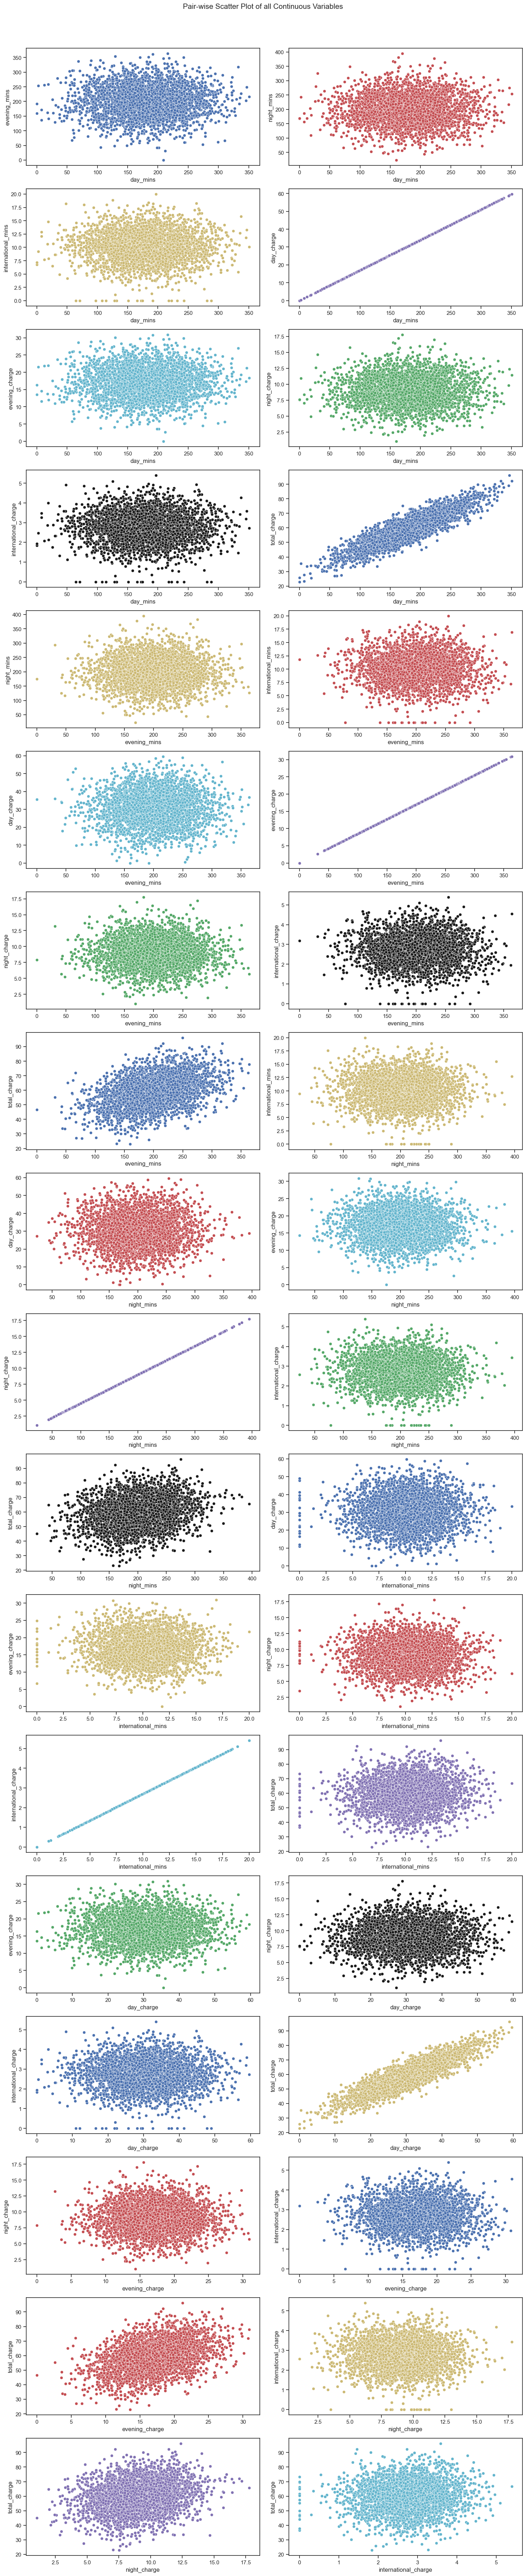

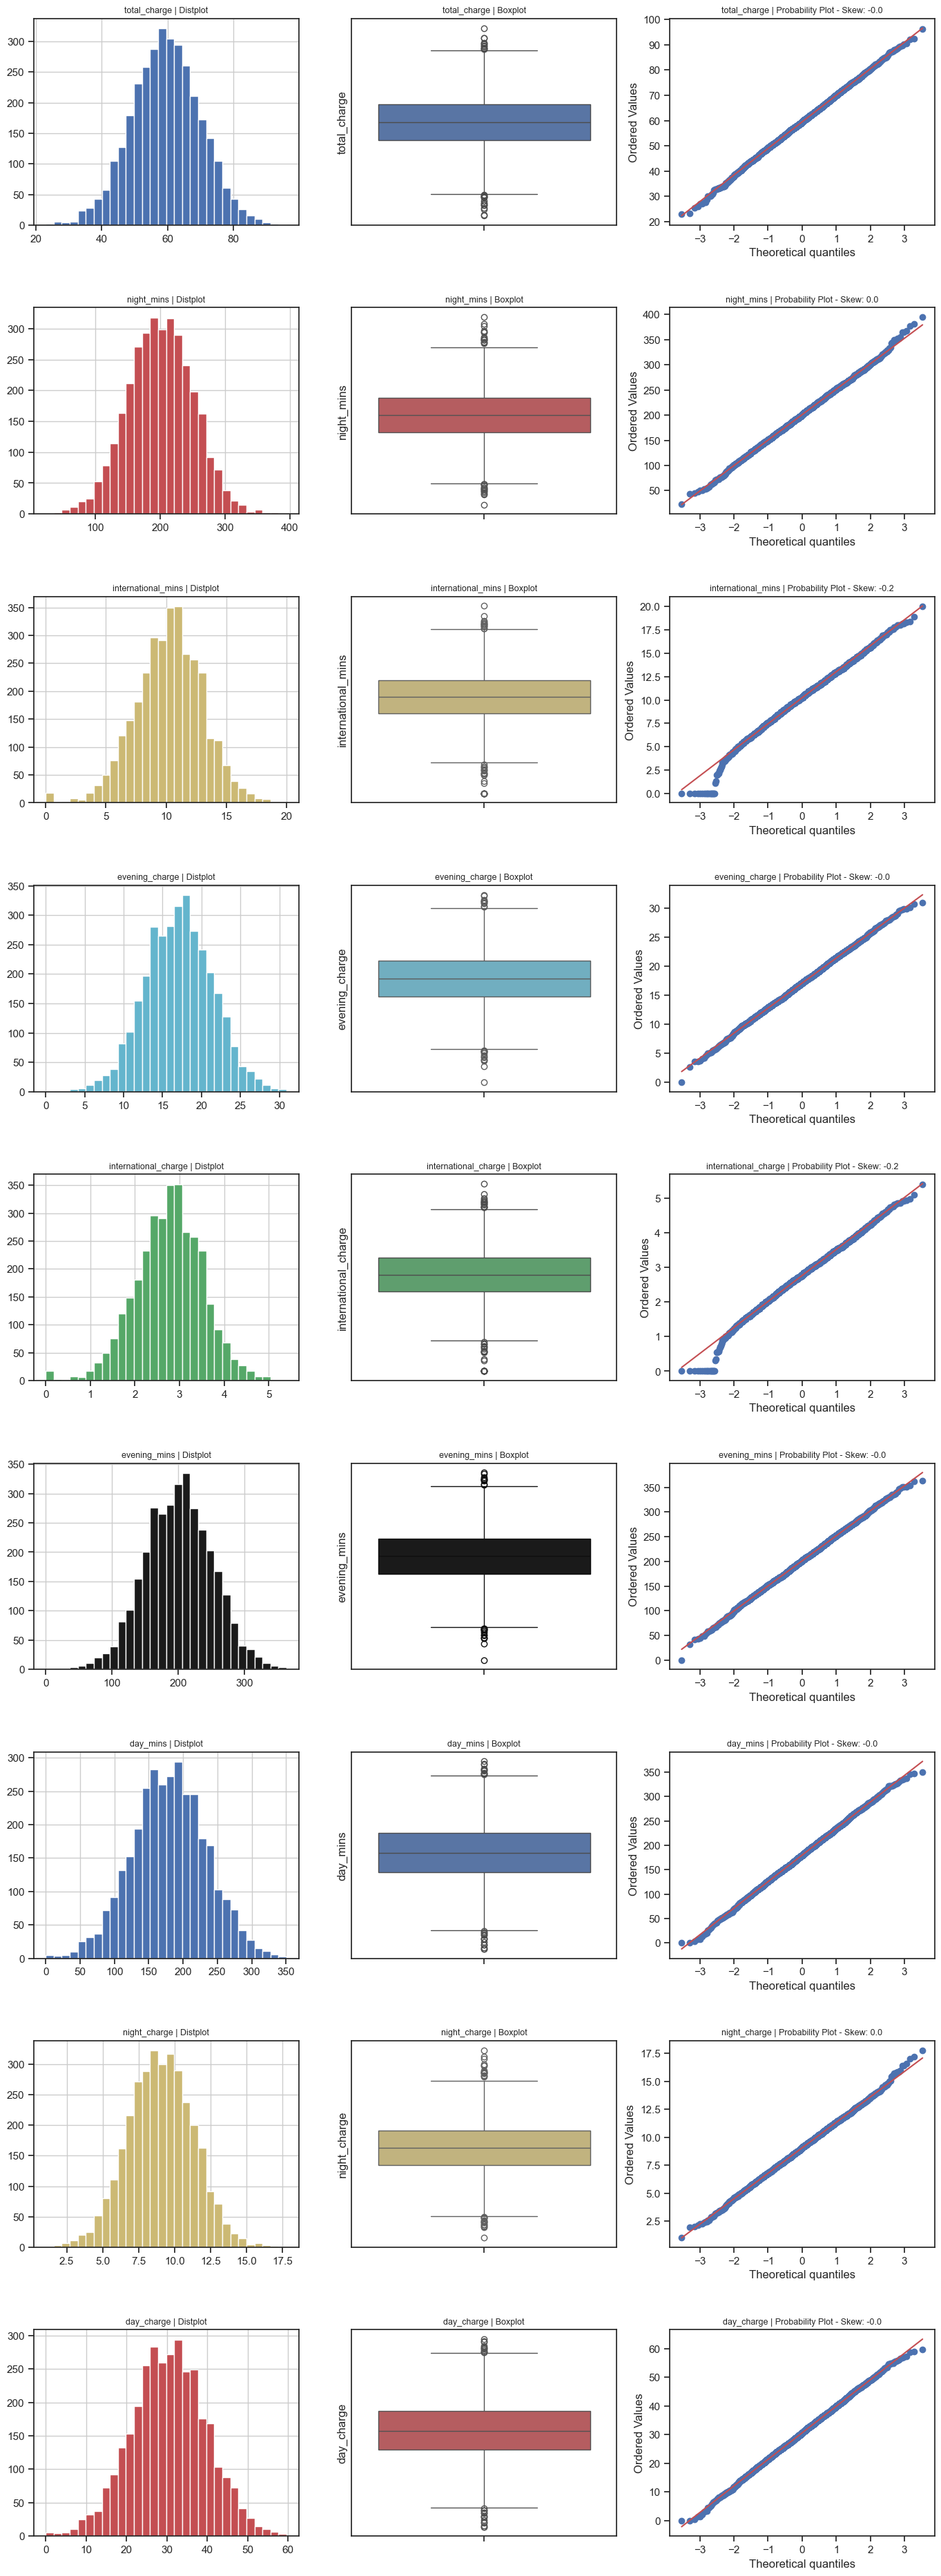

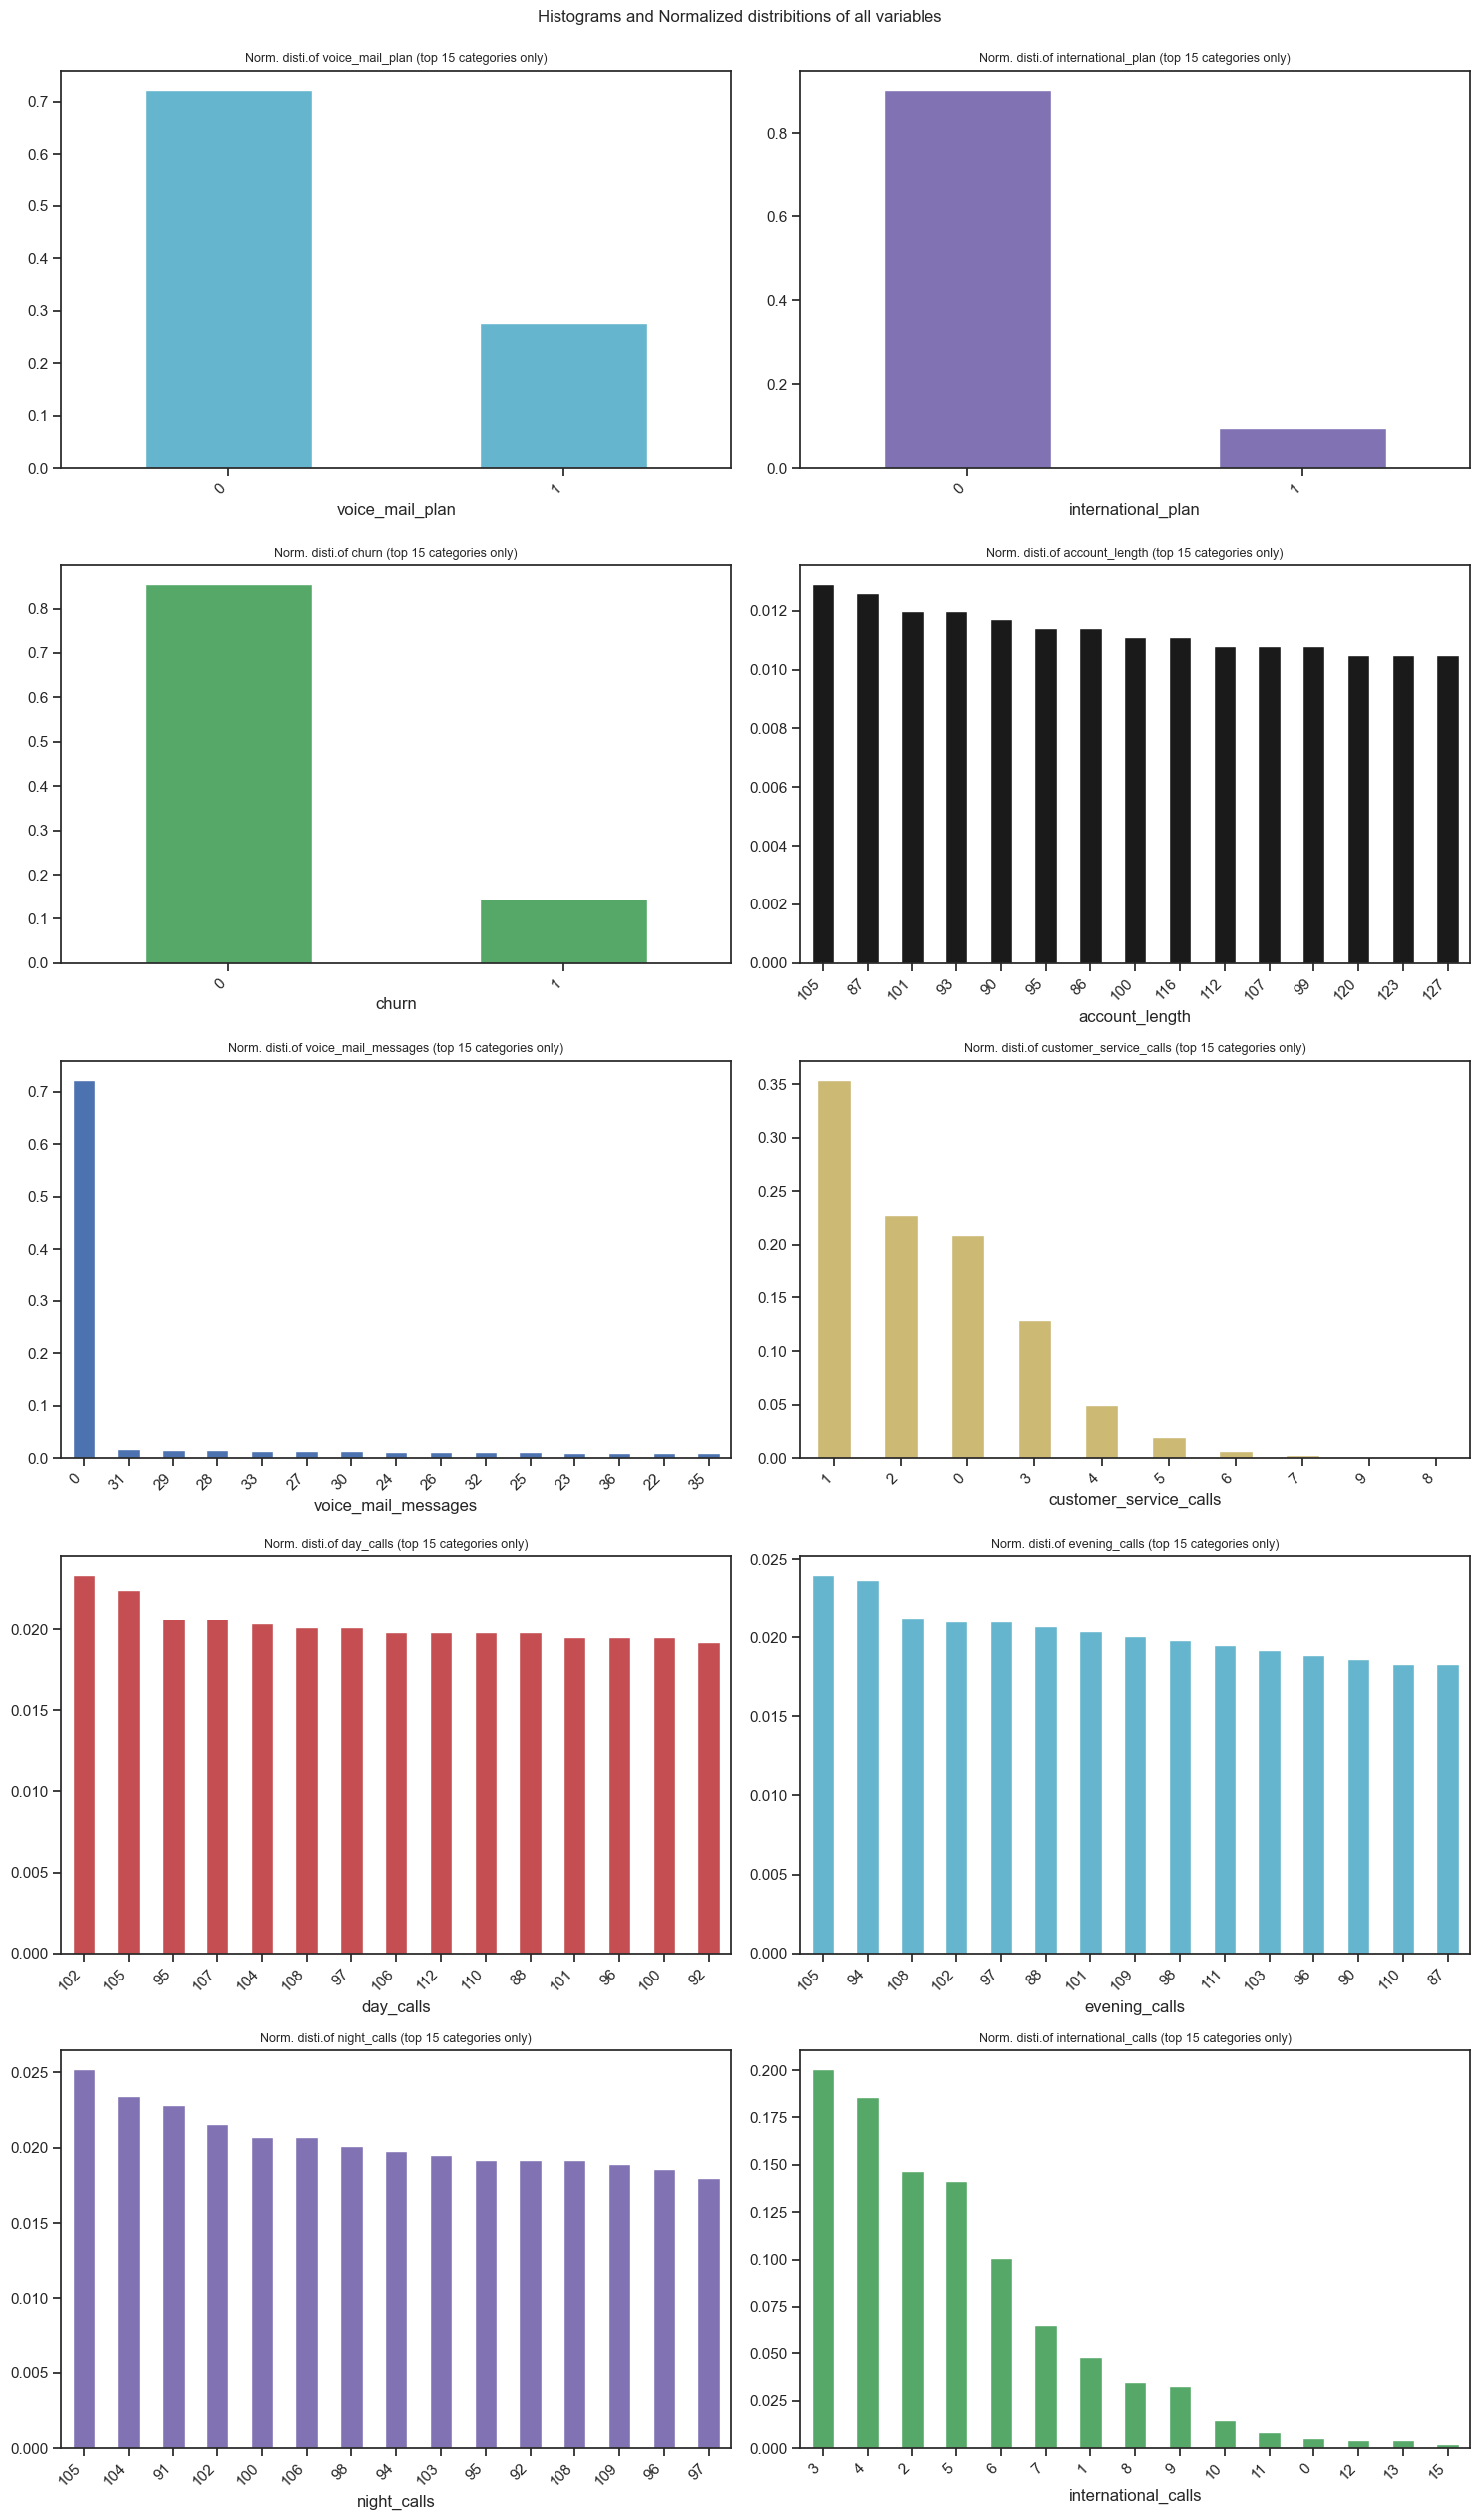

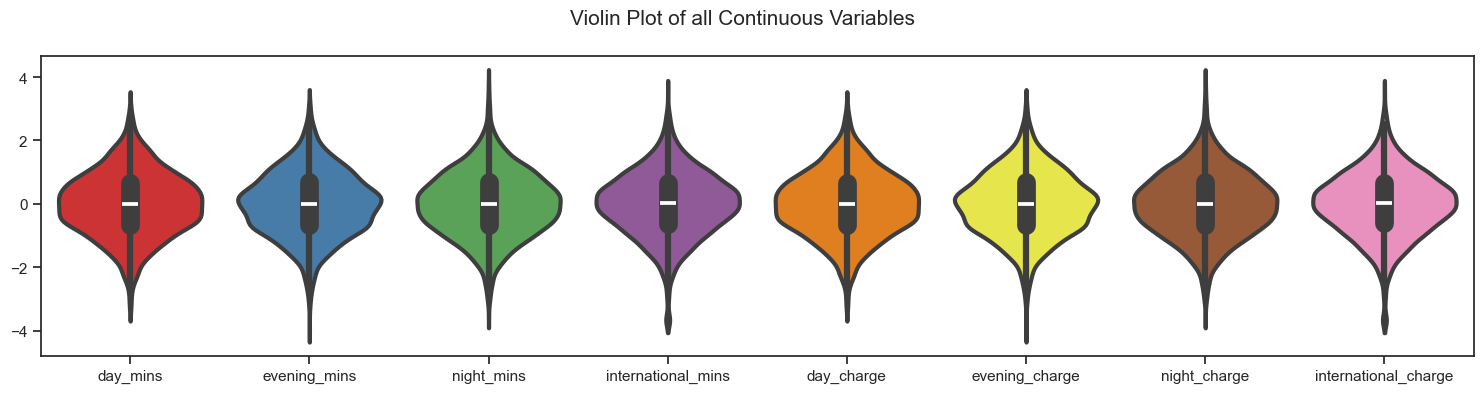

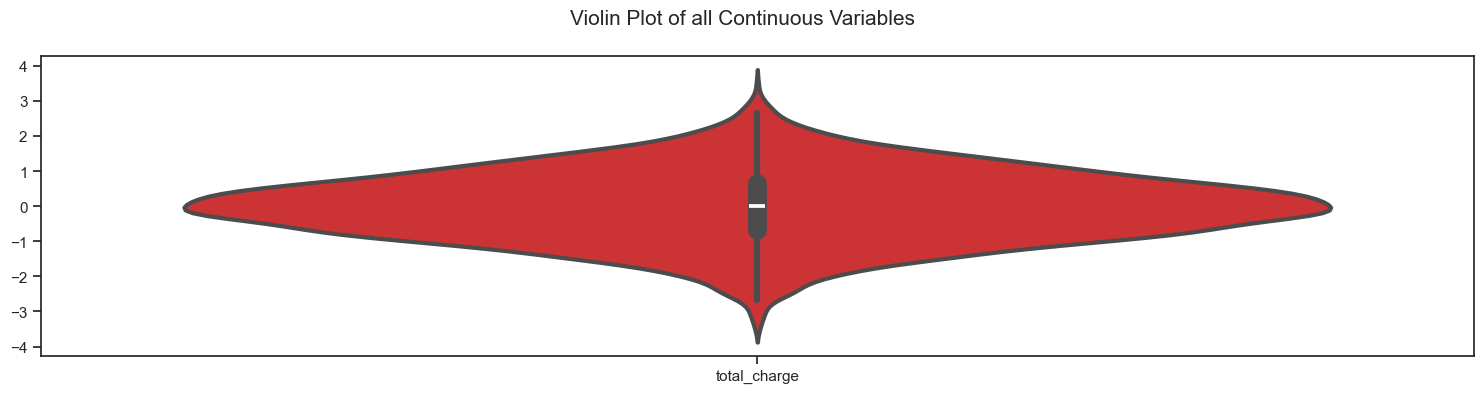

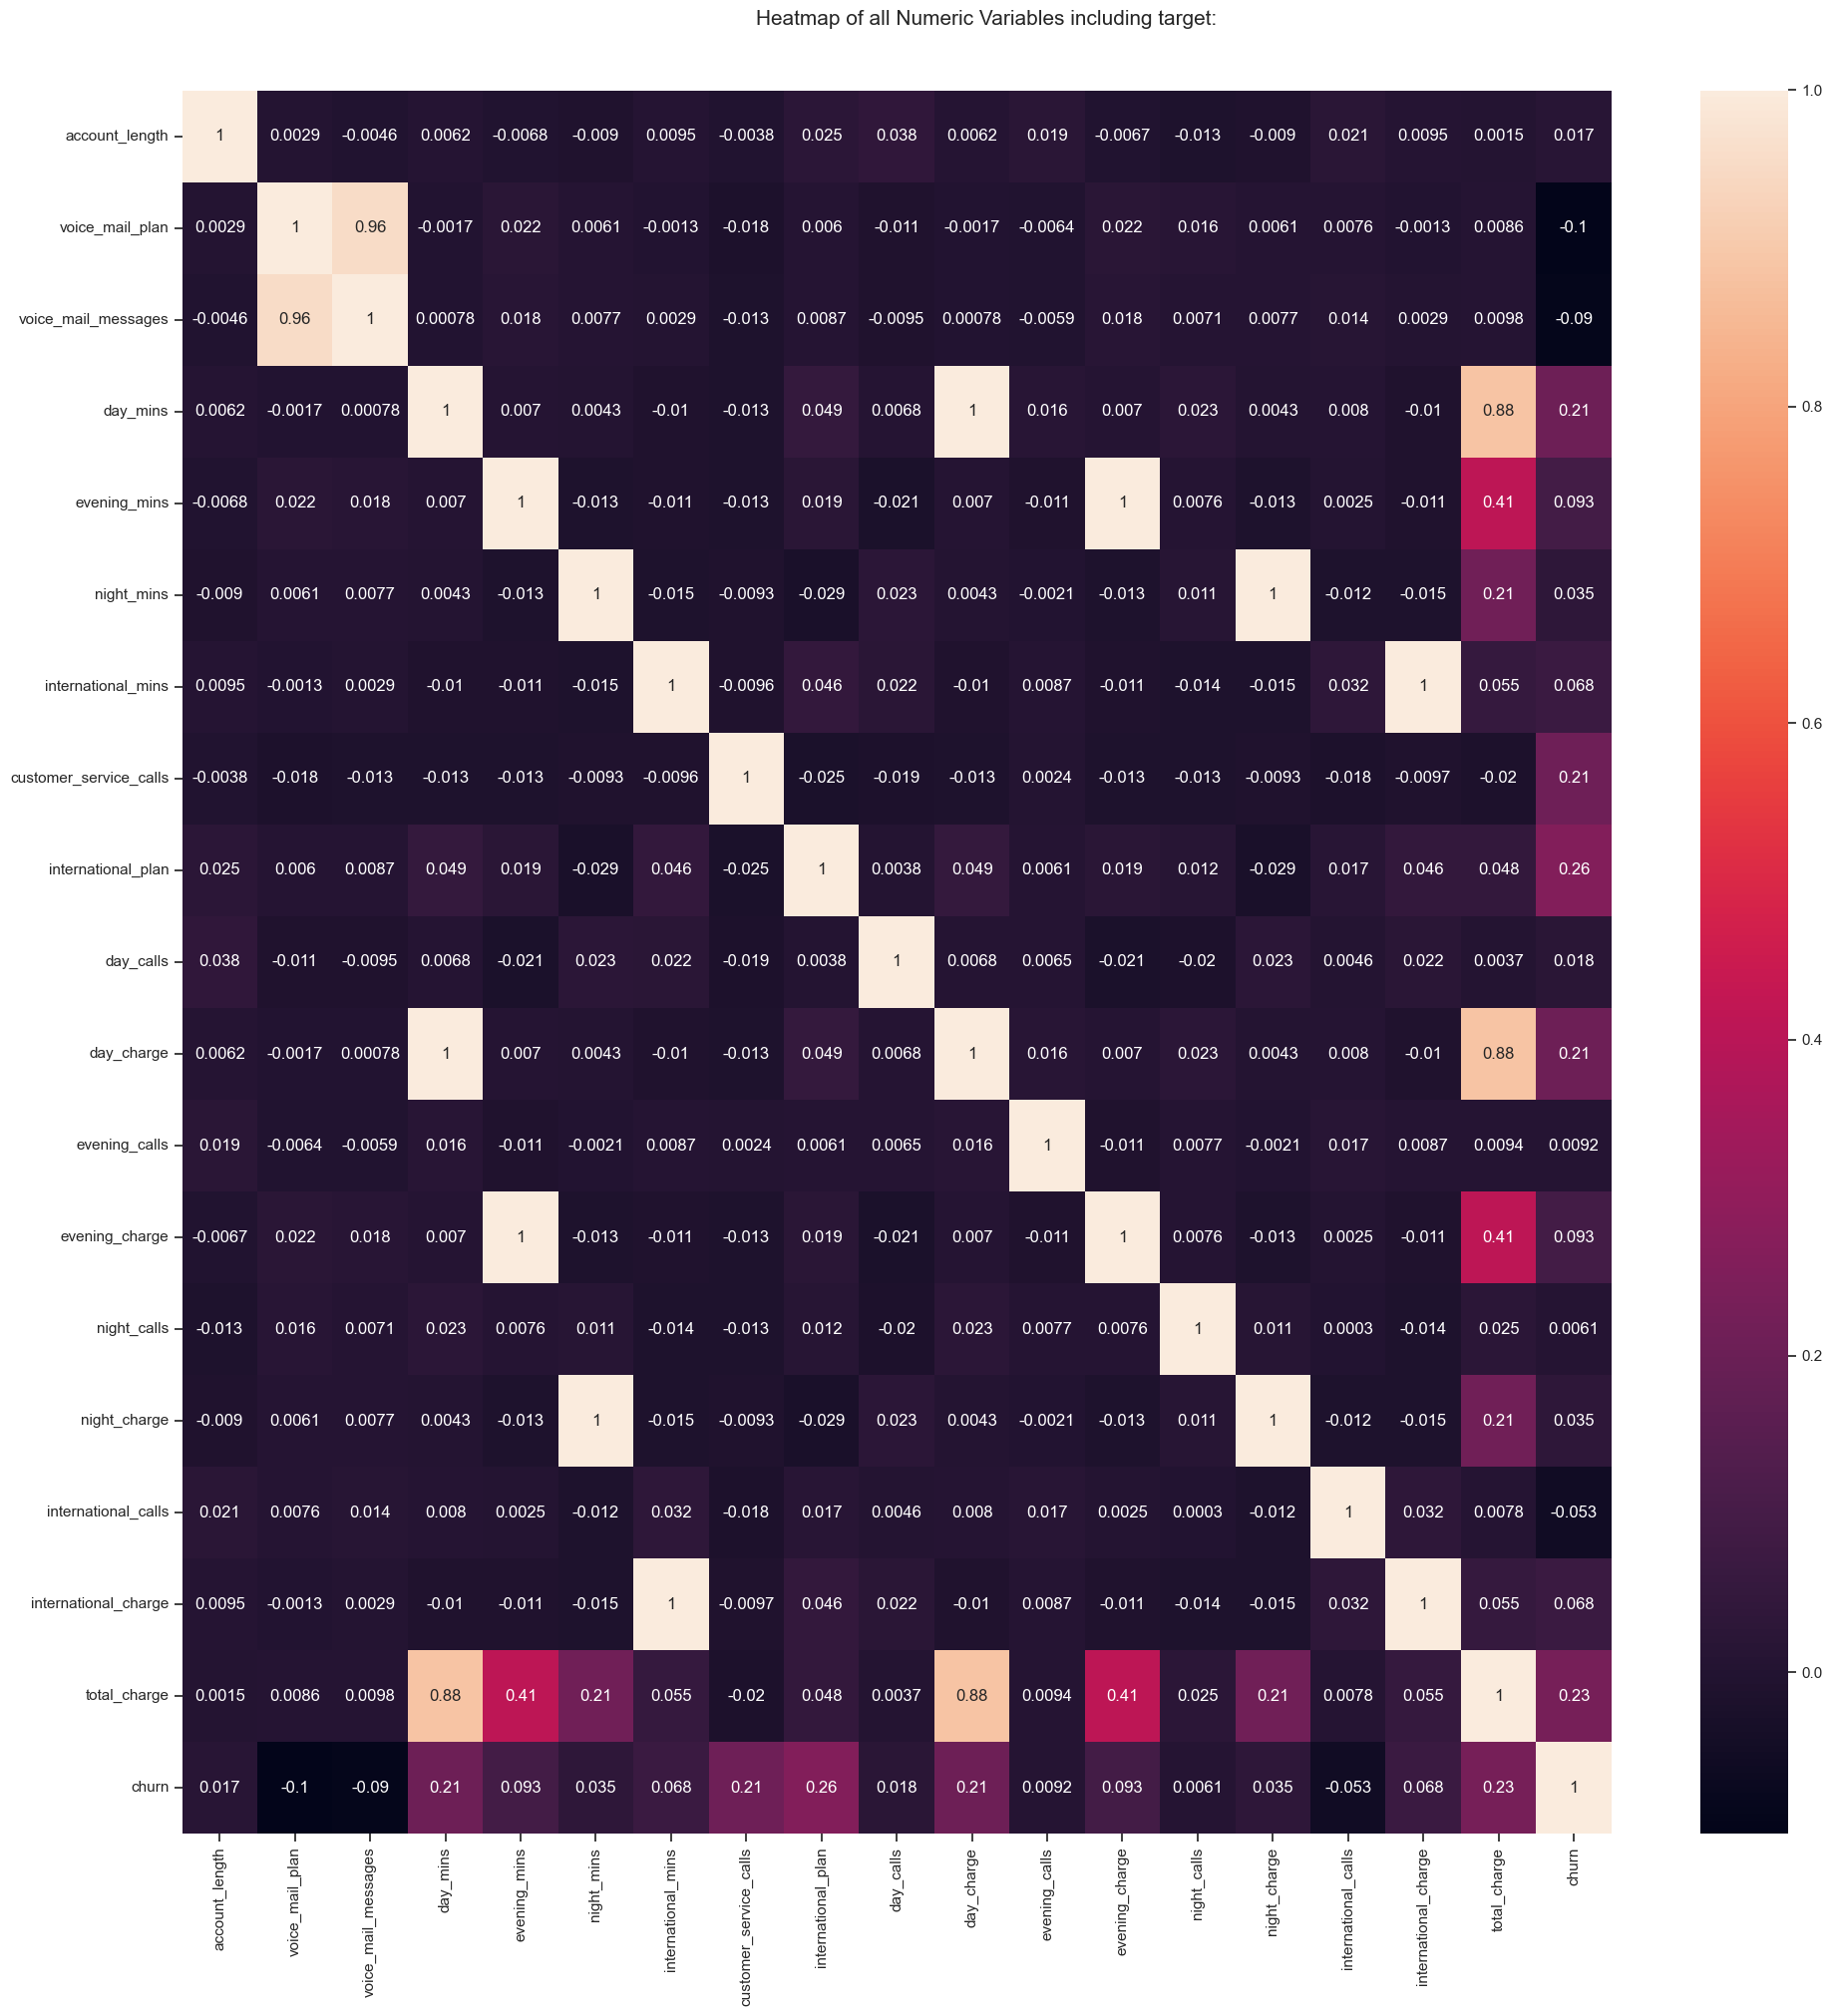

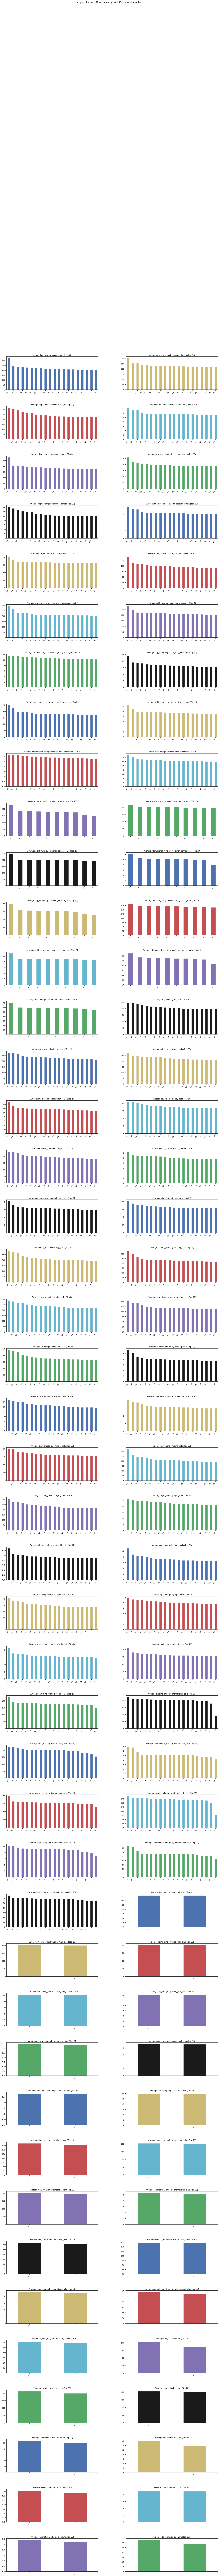

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [9]:
%matplotlib inline    
av = AutoViz_Class()
df_av = av.AutoViz("telecommunications_churn.csv")

## Feature Engineering

In [10]:
#### Feature Engineerin method-1
df.corr()['churn']

account_length            0.016541
voice_mail_plan          -0.102148
voice_mail_messages      -0.089728
day_mins                  0.205151
evening_mins              0.092796
night_mins                0.035493
international_mins        0.068239
customer_service_calls    0.208750
international_plan        0.259852
day_calls                 0.018459
day_charge                0.205151
evening_calls             0.009233
evening_charge            0.092786
night_calls               0.006141
night_charge              0.035496
international_calls      -0.052844
international_charge      0.068259
total_charge              0.231549
churn                     1.000000
Name: churn, dtype: float64

In [11]:
X = df.iloc[:,0:18]
Y = df['churn']

In [12]:
X

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0           128              1                 25             265.1    
1           107              1                 26             161.6    
2           137              0                  0             243.4    
3            84              0                  0             299.4    
4            75              0                  0             166.7    
...              ...              ...                  ...       ...   
3328        192              1                 36             156.2    
3329         68              0                  0             231.1    
3330         28              0                  0             180.8    
3331        184              0                  0             213.8    
3332         74              1                 25             234.4    

      evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4        244.7           10.0                    1             
1         195.5        254.4           13.7                    1             
2         121.2        162.6           12.2                    0             
3          61.9        196.9            6.6                    2             
4         148.3        186.9           10.1                    3             
...            ...         ...                 ...                     ...   
3328      215.5        279.1            9.9                    2             
3329      153.4        191.3            9.6                    3             
3330      288.8        191.9           14.1                    2             
3331      159.6        139.2            5.0                    2             
3332      265.9        241.4           13.7                    0             

      international_plan  day_calls  day_charge  evening_calls  \
0              0             110        45.07          99        
1              0             123        27.47         103        
2              0             114        41.38         110        
3              1              71        50.90          88        
4              1             113        28.34         122        
...                  ...        ...         ...            ...   
3328           0              77        26.55         126        
3329           0              57        39.29          55        
3330           0             109        30.74          58        
3331           1             105        36.35          84        
3332           0             113        39.85          82        

      evening_charge  night_calls  night_charge  international_calls  \
0          16.78           91          11.01              3            
1          16.62          103          11.45              3            
2          10.30          104           7.32              5            
3           5.26           89           8.86              7            
4          12.61          121           8.41              3            
...              ...          ...           ...                  ...   
3328       18.32           83          12.56              6            
3329       13.04          123           8.61              4            
3330       24.55           91           8.64              6            
3331       13.57          137           6.26             10            
3332       22.60           77          10.86              4            

      international_charge  total_charge  
0             2.70              75.56     
1             3.70              59.24     
2             3.29              62.29     
3             1.78              66.80     
4             2.73              52.09     
...                    ...           ...  
3328          2.67              60.10     
3329          2.59              63.53     
3330          3.81              67.74     
3331          1.35              57.53     
3332          3.70              77.01     

[3333 rows x 18 columns]

In [13]:
#### Feature Engineering method-2
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


In [14]:
model = DecisionTreeClassifier()

In [15]:
rfe = RFE(model,n_features_to_select = 6)2
fit = rfe.fit(X,Y)

In [16]:
pd.DataFrame({'Columns':X.columns,"Ranking":fit.ranking_})

Columns          Ranking
0           account_length     4   
1          voice_mail_plan    13   
2      voice_mail_messages     1   
3                 day_mins    11   
4             evening_mins     3   
5               night_mins     2   
6       international_mins     9   
7   customer_service_calls     1   
8       international_plan     1   
9                day_calls     5   
10              day_charge     7   
11           evening_calls     6   
12          evening_charge    12   
13             night_calls     8   
14            night_charge    10   
15     international_calls     1   
16    international_charge     1   
17            total_charge     1

In [17]:
df.corr()['churn']

account_length            0.016541
voice_mail_plan          -0.102148
voice_mail_messages      -0.089728
day_mins                  0.205151
evening_mins              0.092796
night_mins                0.035493
international_mins        0.068239
customer_service_calls    0.208750
international_plan        0.259852
day_calls                 0.018459
day_charge                0.205151
evening_calls             0.009233
evening_charge            0.092786
night_calls               0.006141
night_charge              0.035496
international_calls      -0.052844
international_charge      0.068259
total_charge              0.231549
churn                     1.000000
Name: churn, dtype: float64

###### We are comparing with correlation method and RFE method.There is column which have less correlation with thetarget variable.Hencge we are droping the respective columns (evening-calls,night-calls)

In [18]:
df.drop(['evening_calls','night_calls'],axis =1,inplace= True)

In [19]:
df.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0        128              1                 25             265.1    
1        107              1                 26             161.6    
2        137              0                  0             243.4    
3         84              0                  0             299.4    
4         75              0                  0             166.7    

   evening_mins  night_mins  international_mins  customer_service_calls  \
0      197.4        244.7           10.0                    1             
1      195.5        254.4           13.7                    1             
2      121.2        162.6           12.2                    0             
3       61.9        196.9            6.6                    2             
4      148.3        186.9           10.1                    3             

   international_plan  day_calls  day_charge  evening_charge  night_charge  \
0           0             110        45.07         16.78          11.01      
1           0             123        27.47         16.62          11.45      
2           0             114        41.38         10.30           7.32      
3           1              71        50.90          5.26           8.86      
4           1             113        28.34         12.61           8.41      

   international_calls  international_charge  total_charge  churn  
0           3                   2.70              75.56       0    
1           3                   3.70              59.24       0    
2           5                   3.29              62.29       0    
3           7                   1.78              66.80       0    
4           3                   2.73              52.09       0

In [20]:
df.shape

(3333, 17)

### Feature Selection

In [21]:
x = df.iloc[:,0:16]
y = df['churn']

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,train_size=0.65,random_state=42)

# MODEL BUILDING

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [25]:
model = []
model.append(('LR',LogisticRegression()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('RF',RandomForestClassifier()))
model.append(('XGBM',XGBClassifier()))
model.append(('SVM',SVC()))
model.append(('DT',DecisionTreeClassifier()))

In [26]:
results = []
names = []

for name, models in model:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(models,x,y,cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.862568 (0.023139)
KNN: 0.901283 (0.014466)
RF: 0.977496 (0.010252)
XGBM: 0.978094 (0.009218)
SVM: 0.930993 (0.015943)
DT: 0.953789 (0.017223)


# XGBOOST and RANDOM FOREST has high accuracy when compared to other models

### Hyper Parameter Optimization

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
f_model = RandomForestClassifier()

param = {"n_estimators":[50,100,150,200],"criterion":["gini","entropy"]}

grid = GridSearchCV(estimator = f_model,param_grid = param,cv = KFold())

In [28]:
grid_result = grid.fit(x_train, y_train)

In [29]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9746086142122795, using {'criterion': 'gini', 'n_estimators': 100}


In [30]:
# Building the final model with best parameter
model_final = RandomForestClassifier(criterion= 'gini', n_estimators= 150)
model_final.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [31]:
# Predicting the model using test data
pred=model_final.predict(x_test)

In [32]:
#Accuracy for the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9820051413881749

In [33]:
#confusion metrix
confusion_matrix(pred,y_test)

array([[997,  21],
       [  0, 149]], dtype=int64)

## Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [35]:
steps=[("Standard Scaler",StandardScaler()),
      ("Model",RandomForestClassifier(criterion= 'gini', n_estimators= 150))]

In [36]:
pipe=Pipeline(steps)

In [37]:
#for visualizing the pipeline
set_config(display="diagram")
pipe

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Model', RandomForestClassifier(n_estimators=150))])

In [38]:
X = df.drop("churn",axis=1)
y = df["churn"]

In [39]:
X

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0           128              1                 25             265.1    
1           107              1                 26             161.6    
2           137              0                  0             243.4    
3            84              0                  0             299.4    
4            75              0                  0             166.7    
...              ...              ...                  ...       ...   
3328        192              1                 36             156.2    
3329         68              0                  0             231.1    
3330         28              0                  0             180.8    
3331        184              0                  0             213.8    
3332         74              1                 25             234.4    

      evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4        244.7           10.0                    1             
1         195.5        254.4           13.7                    1             
2         121.2        162.6           12.2                    0             
3          61.9        196.9            6.6                    2             
4         148.3        186.9           10.1                    3             
...            ...         ...                 ...                     ...   
3328      215.5        279.1            9.9                    2             
3329      153.4        191.3            9.6                    3             
3330      288.8        191.9           14.1                    2             
3331      159.6        139.2            5.0                    2             
3332      265.9        241.4           13.7                    0             

      international_plan  day_calls  day_charge  evening_charge  night_charge  \
0              0             110        45.07         16.78          11.01      
1              0             123        27.47         16.62          11.45      
2              0             114        41.38         10.30           7.32      
3              1              71        50.90          5.26           8.86      
4              1             113        28.34         12.61           8.41      
...                  ...        ...         ...             ...           ...   
3328           0              77        26.55         18.32          12.56      
3329           0              57        39.29         13.04           8.61      
3330           0             109        30.74         24.55           8.64      
3331           1             105        36.35         13.57           6.26      
3332           0             113        39.85         22.60          10.86      

      international_calls  international_charge  total_charge  
0              3                   2.70              75.56     
1              3                   3.70              59.24     
2              5                   3.29              62.29     
3              7                   1.78              66.80     
4              3                   2.73              52.09     
...                   ...                   ...           ...  
3328           6                   2.67              60.10     
3329           4                   2.59              63.53     
3330           6                   3.81              67.74     
3331          10                   1.35              57.53     
3332           4                   3.70              77.01     

[3333 rows x 16 columns]

In [44]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn_pandas import DataFrameMapper
X.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_charge', 'night_charge', 'international_calls',
       'international_charge', 'total_charge'],
      dtype='object')

In [46]:
pipe.fit(X,y)

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Model', RandomForestClassifier(n_estimators=150))])